## AccelerateAI - Data Science Global Bootcamp
#### Python Data Analysis: Assignment 01
***

## Credit Card Data Analysis:
Q1: Consider the Credit card dataset provided. The file Credit Card Data.xlsx has 3 tabs with the following data: 
- Credit Card customer master data 
- Spend (Transaction) data 
- Card repayment information <br>

Read the data in the excel file using Pandas library and perform the following: 
 1. [Check the data for any corrupt data, missing values, incorrect data types etc.](#first-bullet) 
 2. Make the following substitution: <br>
   a) [Age of credit card customer can't be less than 18. In case age is less than 18, replace it with mean of age.](#second-bullet)
 3. [Answer the following questions:](#third-bullet)
   - a) How many unique customers are there? 
   - b) How many spend categories are there? 
   - c) Which category has the highest average spend? 
   - d) What is the average monthly spent by product categories? 
   - e) Which customers are reaching 90% or more of their spending limit? 
   - f) Which city has the maximum number of spenders, each month? Is there a need to run campaigns in specific cities? 
   - g) Which age group spends the most?

In [91]:
import numpy as np
import pandas as pd 

##### Read the data in excel file using Pandas library
- Credit Card customer acquisition
- Spend (Transaction) Data
- Payment Information 


In [92]:
# Credit Card customer acquisition: Sheet 0
customer_df = pd.read_excel("Credit Card Data.xlsx", sheet_name=0)
customer_df.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,47,BANGALORE,Gold,1500000,C1,Self Employed
1,2,A2,56,CALCUTTA,Silver,300000,C2,Salaried_MNC
2,3,A3,30,COCHIN,Platimum,540000,C3,Salaried_Pvt
3,4,A4,22,BOMBAY,Platimum,840084,C4,Govt
4,5,A5,59,BANGALORE,Platimum,420084,C5,Normal Salary


In [93]:
# Spend Data: Sheet 1
trans_df = pd.read_excel("Credit Card Data.xlsx", sheet_name=1)
trans_df.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,344054.980813
1,2,A1,2004-01-03,PETRO,935.495203
2,3,A1,2004-01-15,CLOTHES,8687.895474
3,4,A1,2004-01-25,FOOD,341.159711
4,5,A1,2005-01-17,CAMERA,3406.639477


In [94]:
# Payment Information: Sheet 2
payment_df = pd.read_excel("Credit Card Data.xlsx", sheet_name=2)
payment_df.head()

,SL No:,Customer,Month,Amount
0,1,A1,2006-05-15,2.308473e+05
1,2,A1,2005-08-27,1.835124e+03
2,3,A1,2004-03-07,4.858701e+03
3,4,A1,2005-03-01,1.360527e+06
4,5,A1,2004-02-14,1.902322e+05


<a class="anchor" id="first-bullet"></a>

### 1. Check the data for any corrupt data, missing values, incorrect data types etc.  

In [95]:
# use the pandas info() to check for missing cvalues and data types 
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        100 non-null    int64 
 1   Customer  100 non-null    object
 2   Age       100 non-null    int64 
 3   City      100 non-null    object
 4   Product   100 non-null    object
 5   Limit     100 non-null    int64 
 6   Company   100 non-null    object
 7   Segment   100 non-null    object
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [96]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [97]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    807 non-null    int64         
 1   Customer  807 non-null    object        
 2   Month     803 non-null    datetime64[ns]
 3   Amount    807 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 25.3+ KB


In [98]:
# There are 4 missing values in Month column in payments_df. Let's check those rows
payment_df[payment_df.Month.isnull()]

,SL No:,Customer,Month,Amount
274,275,A29,NaT,139343.954497
299,300,A30,NaT,75520.695090
418,419,A40,NaT,4203.395579
789,790,A9,NaT,20150.636740


<a class="anchor" id="second-bullet"></a>

### 2. Let's check the age distribution of customers from customer_df

In [99]:
customer_df.Age.describe()

count    100.000000
mean      46.460000
std       17.816925
min       14.000000
25%       30.000000
50%       47.500000
75%       62.250000
max       75.000000
Name: Age, dtype: float64

In [100]:
# Who are those customers with less than?
customer_df.query('Age < 18')

,No,Customer,Age,City,Product,Limit,Company,Segment
46,47,A47,16,CHENNAI,Platimum,1380000,C9,Normal Salary
69,70,A70,16,BOMBAY,Platimum,420000,C32,Self Employed
93,94,A94,14,COCHIN,Gold,500000,C17,Govt


###### a) Age can't be less than 18. In case age is less than 18, let's replace it with mean of age values.

In [101]:
customer_df.loc[(customer_df.Age < 18),'Age']=customer_df.Age.mean()

#Check the distribution again
customer_df.Age.describe()

count    100.000000
mean      47.393800
std       16.946251
min       18.000000
25%       33.000000
50%       47.500000
75%       62.250000
max       75.000000
Name: Age, dtype: float64

<a class="anchor" id="third-bullet"></a>

### 3.Answer the following questions:

##### a) How many customers are there?

In [102]:
print ("# Customer - Customer data:", customer_df.Customer.nunique())
print ("# Customer - Transaction data:", trans_df.Customer.nunique())
print ("# Customer - Repayment data:", payment_df.Customer.nunique())

# Customer - Customer data: 100
# Customer - Transaction data: 100
# Customer - Repayment data: 100


##### How many spend categories are there? 

In [103]:
print ("# Spend Categories:", trans_df.Type.nunique())

# Spend Categories: 15


In [104]:
# What are those spend categories? 
trans_df.Type.value_counts()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
SHOPPING        113
BUS TICKET       99
JEWELLERY        95
CLOTHES          95
RENTAL           76
MOVIE TICKET     76
BIKE             49
AUTO             40
CAR              30
SANDALS          28
Name: Type, dtype: int64

##### Which category has the highest average spend?

In [105]:
# Here we need to group by spend category (Type) and then find the average. 
# we can sort in a descending order to present the results
# The above can be done in one line - this is called chaining. 

avg_spend_df = trans_df.groupby("Type")['Amount'].mean().sort_values(ascending=False).round(2)
avg_spend_df

Type
CAR             409143.47
AIR TICKET      254632.19
JEWELLERY       239218.69
BIKE            210701.27
AUTO             27320.76
CLOTHES          25140.16
CAMERA           21499.80
RENTAL           13106.51
BUS TICKET       12681.03
SHOPPING          7394.33
SANDALS           2516.63
MOVIE TICKET      1875.30
TRAIN TICKET      1627.49
PETRO              549.48
FOOD               341.17
Name: Amount, dtype: float64

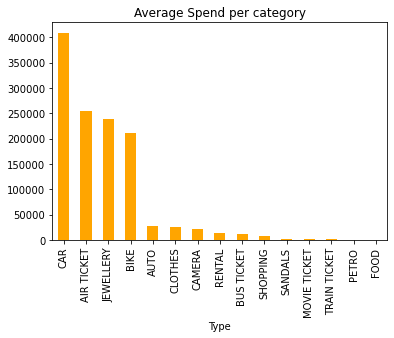

In [106]:
# Better to plot and compare
avg_spend_df.plot(kind='bar', color="orange").set_title("Average Spend per category")
None   # to remove unnessecary print

**Car** has the highest spend, followed by **air ticket**. 

In [107]:
#Are air tickets this expensive??
trans_df[trans_df['Type'] == 'AIR TICKET'].sample(5)

,Sl No:,Customer,Month,Type,Amount
1413,1414,A55,2004-01-25,AIR TICKET,212405.177382
475,476,A28,2005-05-26,AIR TICKET,331262.404505
1412,1413,A54,2004-01-15,AIR TICKET,485322.421134
73,74,A72,2004-02-05,AIR TICKET,103324.712610
1477,1478,A60,2006-07-03,AIR TICKET,190013.076066


In [108]:
# Let's compare with some transaction involving purchase of jewellery
trans_df[trans_df['Type'] == 'JEWELLERY'].sample(5)

,Sl No:,Customer,Month,Type,Amount
1225,1226,A41,2005-05-07,JEWELLERY,12822.829938
1167,1168,A41,2005-02-03,JEWELLERY,161105.162092
1432,1433,A45,2006-03-23,JEWELLERY,101040.275708
586,587,A25,2005-05-28,JEWELLERY,107718.549353
651,652,A32,2004-01-12,JEWELLERY,325750.838404


##### What is the average monthly spend by product categories? 

In [109]:
# We will use the transaction data now.The Month column has date in trans_df. 
trans_df.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,344054.980813
1,2,A1,2004-01-03,PETRO,935.495203
2,3,A1,2004-01-15,CLOTHES,8687.895474
3,4,A1,2004-01-25,FOOD,341.159711
4,5,A1,2005-01-17,CAMERA,3406.639477


In [110]:
#lets create an actual month column from timestamp

# Rename Month to TransDate
trans_df.rename(columns={'Month':'TransDate'}, inplace=True)

# Extract month and add it as a new column
trans_df['Month'] = trans_df['TransDate'].apply(lambda x:x.month)


# Extract Year and add it as a new column
trans_df['Year'] = trans_df['TransDate'].apply(lambda x:x.year)

In [111]:
trans_df.sample(5)

,Sl No:,Customer,TransDate,Type,Amount,Month,Year
37,38,A38,2005-05-24,BIKE,196261.829721,5,2005
365,366,A13,2005-05-25,FOOD,485.747760,5,2005
1368,1369,A39,2006-07-03,AIR TICKET,447576.916059,7,2006
969,970,A31,2004-01-25,SHOPPING,8855.883350,1,2004
456,457,A28,2004-04-25,TRAIN TICKET,636.981354,4,2004


In [112]:
# Group by Month (Year) and get the average 
spend_df=trans_df.groupby(['Year','Month','Type'], as_index=False)['Amount'].mean().round(2)        #2 decimal places

In [113]:
spend_df.head()

,Year,Month,Type,Amount
0,2004,1,AIR TICKET,257735.68
1,2004,1,AUTO,16260.27
2,2004,1,BIKE,176136.06
3,2004,1,BUS TICKET,10181.61
4,2004,1,CAMERA,20912.67


In [114]:
# pivot the data - Rows = Year, Month;  Columns = Type Spend Category ; Values = Amount

spend_pivot = pd.pivot_table(spend_df, index=['Year','Month'], columns='Type', values='Amount')

In [115]:
# Monthly spend (for each year) by Spend Categories 
spend_pivot

Type        AIR TICKET      AUTO       BIKE  BUS TICKET    CAMERA         CAR  \
Year Month                                                                      
2004 1       257735.68  16260.27  176136.06    10181.61  20912.67   369868.57   
     2       214071.84       NaN  222235.99    22386.40       NaN         NaN   
     3       455343.36       NaN        NaN         NaN  14377.59         NaN   
     4             NaN       NaN        NaN    11772.79  35545.00         NaN   
     5             NaN       NaN        NaN     2033.75       NaN         NaN   
     9             NaN       NaN        NaN     4813.98       NaN   389408.87   
     11      209883.26       NaN  341651.68     5716.70       NaN   459281.33   
2005 1       303015.61       NaN  213492.29         NaN  22898.55         NaN   
     2       223150.72  34280.59        NaN    16138.93  14806.78  1307745.09   
     4         7531.58       NaN  120955.47         NaN  23899.44         NaN   
     5       259520.01   4904.89  187850.43     9868.46  13548.27         NaN   
     6       181711.91       NaN        NaN     8962.48  21912.07         NaN   
     7       296436.65       NaN        NaN         NaN  27222.86         NaN   
     8       227449.28       NaN        NaN    34019.05  29223.32         NaN   
     9       289240.16       NaN        NaN         NaN  32782.09         NaN   
     10      213797.64       NaN        NaN     4326.49       NaN   175440.27   
     11      121396.50       NaN  207172.36    14339.55       NaN         NaN   
     12       94397.46   1374.59        NaN         NaN       NaN         NaN   
2006 1       385448.78       NaN        NaN         NaN  29510.53         NaN   
     2       263273.50       NaN  125723.17    41831.67  20150.64   475406.73   
     3       271893.56  31014.27  283637.43    14994.27  23017.28   397509.35   
     4       276025.39  39690.40  158209.29     2329.78  16468.37   123053.08   
     5       274384.02  25656.11        NaN         NaN  40368.97   361677.78   
     6       275155.15       NaN        NaN    13227.41       NaN         NaN   
     7       344362.32       NaN        NaN     1762.55  21574.68         NaN   
     8       327284.02       NaN        NaN    17564.60       NaN         NaN   
     9       303458.31       NaN        NaN         NaN       NaN         NaN   
     10            NaN       NaN        NaN         NaN       NaN   490613.35   
     11            NaN  25194.89  464034.81     4282.07  16338.03         NaN   
     12            NaN   2274.23        NaN         NaN       NaN         NaN   

Type         CLOTHES    FOOD  JEWELLERY  MOVIE TICKET   PETRO    RENTAL  \
Year Month                                                                
2004 1      22478.24  352.63  281915.60       1801.29  546.67  12517.36   
     2      21562.59  335.97  174222.09           NaN  562.31       NaN   
     3      18170.60  446.42  156577.20           NaN  494.72       NaN   
     4           NaN  339.78  298115.64       2016.08  580.66       NaN   
     5           NaN  356.48   94116.63           NaN     NaN   9944.19   
     9           NaN  330.85        NaN           NaN  522.57  17341.00   
     11          NaN  222.13        NaN           NaN  701.65       NaN   
2005 1      11379.71  294.04  145186.79           NaN  706.23  22198.62   
     2      24642.46  293.98  246365.70       2252.06  594.15  12783.10   
     4      38069.30  156.04   37301.70           NaN  567.59       NaN   
     5      23423.02  296.89  212994.88       2183.44  627.40  12910.12   
     6      44392.93  293.08  322625.84           NaN  472.98       NaN   
     7           NaN  599.36        NaN           NaN  832.19  23881.33   
     8           NaN  358.19        NaN       2866.79  590.89       NaN   
     9           NaN     NaN  278895.08        954.69  490.23       NaN   
     10          NaN     NaN        NaN       3255.54  604.28       NaN   
     11     26346.87  304.78  434209.47        409.39  55

##### Which customers are reaching 90% or more of their spending limit?

In [116]:
# Lets have a look at the repayment data
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    807 non-null    int64         
 1   Customer  807 non-null    object        
 2   Month     803 non-null    datetime64[ns]
 3   Amount    807 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 25.3+ KB


**4 rows have null in Month. Let's drop those.**

In [117]:
payment_df.dropna(how="any",axis=0, inplace=True)                                       
payment_df.info()                                            # What's wrong with this?? 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 806
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    803 non-null    int64         
 1   Customer  803 non-null    object        
 2   Month     803 non-null    datetime64[ns]
 3   Amount    803 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 31.4+ KB


**Who are the top 10 customers in terms of repayment?**

In [118]:
# Group by Customer and sum the Amount 
topcust_df = payment_df.groupby('Customer')['Amount'].sum().sort_values(ascending=False)
topcust_df.head(10)

Customer
A47    4.092247e+06
A61    2.776651e+06
A58    2.711600e+06
A56    2.372900e+06
A48    2.110238e+06
A36    2.068917e+06
A44    2.003032e+06
A24    1.998198e+06
A49    1.919454e+06
A42    1.841543e+06
Name: Amount, dtype: float64

##### To compare spend and card limit, we need to merge (Aggregated) Spend data with Customer data

In [119]:
# Aggregate the spend data by Customer and Year-Month 
monthly_spend_df = trans_df.groupby(['Customer','Year','Month'], as_index=False)['Amount'].sum()

In [120]:
# Merge the customer information and aggregated spend data
monthly_spend_df = pd.merge(customer_df, monthly_spend_df, on='Customer', how='left') 

In [121]:
# Calculate Spend Ratio = Amount Spent / Card Limit 

monthly_spend_df["SpendRatio"] = monthly_spend_df.Amount/monthly_spend_df.Limit

# Who is reaching 90% of spend limit 
monthly_spend_df.query("SpendRatio > 0.9")['Customer'].unique()

array(['A1', 'A4', 'A5', 'A13', 'A15', 'A16', 'A33', 'A48', 'A49', 'A52',
       'A53', 'A62', 'A69', 'A96', 'A99'], dtype=object)

In [122]:
#Let's look at some of those transactions
monthly_spend_df.query("SpendRatio > 0.9").head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Year,Month,Amount,SpendRatio
4,1,A1,47.0,BANGALORE,Gold,1500000,C1,Self Employed,2005,2,1.360527e+06,0.907018
27,4,A4,22.0,BOMBAY,Platimum,840084,C4,Govt,2004,1,8.214110e+05,0.977772
38,5,A5,59.0,BANGALORE,Platimum,420084,C5,Normal Salary,2006,3,3.937892e+05,0.937406
131,13,A13,38.0,BANGALORE,Gold,500000,C13,Salaried_MNC,2006,11,4.624256e+05,0.924851
155,15,A15,41.0,CALCUTTA,Gold,500000,C15,Govt,2005,9,4.937968e+05,0.987594


##### Which city has the maximum number of spenders, each month? Is there a need to run campaigns in specific cities?

In [123]:
# Group the data by City
city_spend_df=monthly_spend_df.groupby(['City', 'Month'], as_index=False)['Amount'].sum().round(2) 

In [124]:
# reshape the data for plotting
city_spend_pivot = city_spend_df.pivot(index='Month', columns='City', values='Amount')
city_spend_pivot.head()

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
Month,,,,,,,,
1,3126274.90,2328805.56,3244926.98,2597978.19,4617419.79,703130.98,1815232.34,814089.04
2,3971498.30,3008375.45,1658105.86,1969179.47,4149994.83,365936.54,751930.88,670849.37
3,2027004.09,2897458.18,2176908.20,1166274.69,2020514.68,1011287.40,1029935.01,881084.93
4,1337310.21,850195.62,1551686.80,1080791.32,2347582.32,1161682.99,148841.06,97370.19
5,3130804.91,778840.57,1967827.09,1924341.32,2844139.80,1072653.18,895786.43,1438594.96


<AxesSubplot:xlabel='Month'>

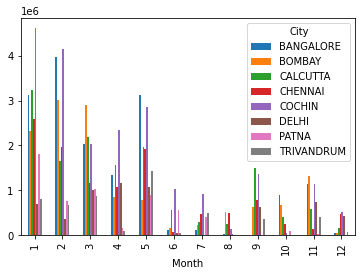

In [125]:
city_spend_pivot.plot(kind='bar')

We see that most cities have very low spend during the month of June - Dec. We need to run campaigns across all the cities.
Calcutta is doing well in 9th Month and Bombay in 11th Month. So they can be excluded in those months. 

##### Which age group spends the most amount of money?

In [126]:
# Let's create certain age groups
cust_trans_df["Age_group"] = pd.cut(x=cust_trans_df['Age'], bins=[18,30,60,100], labels=["GenX","Middle","Senior"])

In [127]:
cust_trans_df.sample(10)

,Sl No:,Customer,TransDate,Type,Amount,Month,Year,No,Age,City,Product,Limit,Company,Segment,Age_group
945,926,A45,2005-12-03,RENTAL,18601.855910,12,2005,45,65.0,COCHIN,Gold,1500000,C7,Salaried_Pvt,Senior
829,1139,A41,2005-07-03,PETRO,708.863045,7,2005,41,35.0,COCHIN,Platimum,1500000,C23,Govt,Middle
226,305,A17,2006-03-28,CAMERA,22184.301214,3,2006,17,26.0,BOMBAY,Gold,500000,C17,Self Employed,GenX
1288,1189,A60,2004-01-12,CAMERA,31035.419971,1,2004,60,54.0,CALCUTTA,Gold,1500000,C22,Salaried_Pvt,Middle
891,1141,A43,2005-09-03,PETRO,887.166035,9,2005,43,50.0,BANGALORE,Gold,1500000,C25,Self Employed,Middle
1090,1003,A50,2006-04-19,AIR TICKET,479179.658267,4,2006,50,58.0,COCHIN,Platimum,1200000,C12,Salaried_Pvt,Middle
1040,987,A48,2005-02-23,AUTO,42775.250932,2,2005,48,47.0,TRIVANDRUM,Platimum,540054,C10,Self Employed,Middle
792,979,A40,2004-01-12,BUS TICKET,2856.936535,1,2004,40,64.0,CALCUTTA,Platimum,1500000,C22,Salaried_Pvt,Senior
1077,1147,A49,2006-03-03,AUTO,19956.909412,3,2006,49,60.0,CALCUTTA,Platimum,780000,C11,Salaried_MNC,Middle
844,691,A42,2004-11-23,AIR TICKET,370056.533784,11,2004,42,71.0,BOMBAY,Gold,1500000,C24,Normal Salary,Senior


<AxesSubplot:xlabel='Age_group'>

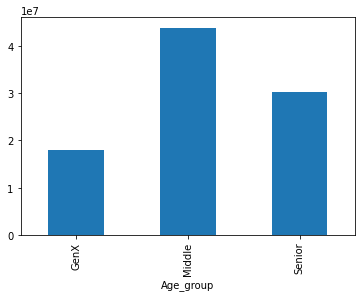

In [128]:
spend_age_df = cust_trans_df.groupby('Age_group')['Amount'].sum()
spend_age_df.plot(kind='bar')